<a href="https://colab.research.google.com/github/dharsalis/PenulisanIlmiah/blob/main/PI_Dani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collecting

## Import Library

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Assesing Data

In [93]:
df = pd.read_csv('/content/sample_data/freelancer_earnings_bd.csv')

In [94]:
df.head(5)

,Freelancer_ID,Job_Category,Platform,Experience_Level,Client_Region,Payment_Method,Job_Completed,Earnings_USD,Hourly_Rate,Job_Success_Rate,Client_Rating,Job_Duration_Days,Project_Type,Rehire_Rate,Marketing_Spend
0,1,Web Development,Fiverr,Beginner,Asia,Mobile Banking,180,1620,95.79,68.73,3.18,1,Fixed,40.19,53
1,2,App Development,Fiverr,Beginner,Australia,Mobile Banking,218,9078,86.38,97.54,3.44,54,Fixed,36.53,486
2,3,Web Development,Fiverr,Beginner,UK,Crypto,27,3455,85.17,86.60,4.20,46,Hourly,74.05,489
3,4,Data Entry,PeoplePerHour,Intermediate,Asia,Bank Transfer,17,5577,14.37,79.93,4.47,41,Hourly,27.58,67
4,5,Digital Marketing,Upwork,Expert,Asia,Crypto,245,5898,99.37,57.80,5.00,41,Hourly,69.09,489


In [95]:
df.shape

(1950, 15)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Freelancer_ID      1950 non-null   int64  
 1   Job_Category       1950 non-null   object 
 2   Platform           1950 non-null   object 
 3   Experience_Level   1950 non-null   object 
 4   Client_Region      1950 non-null   object 
 5   Payment_Method     1950 non-null   object 
 6   Job_Completed      1950 non-null   int64  
 7   Earnings_USD       1950 non-null   int64  
 8   Hourly_Rate        1950 non-null   float64
 9   Job_Success_Rate   1950 non-null   float64
 10  Client_Rating      1950 non-null   float64
 11  Job_Duration_Days  1950 non-null   int64  
 12  Project_Type       1950 non-null   object 
 13  Rehire_Rate        1950 non-null   float64
 14  Marketing_Spend    1950 non-null   int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 228.6+ KB


# Data Cleaning

In [97]:
# Memeriksa missing value pada dataset
df.isna().sum()

,0
Freelancer_ID,0
Job_Category,0
Platform,0
Experience_Level,0
Client_Region,0
Payment_Method,0
Job_Completed,0
Earnings_USD,0
Hourly_Rate,0
Job_Success_Rate,0


In [98]:
# Memeriksa nilai kosong
df.isnull().sum()

,0
Freelancer_ID,0
Job_Category,0
Platform,0
Experience_Level,0
Client_Region,0
Payment_Method,0
Job_Completed,0
Earnings_USD,0
Hourly_Rate,0
Job_Success_Rate,0


In [99]:
# Memeriksa duplikasi data
print("Jumlah data duplikat: ", df.duplicated().sum())

Jumlah data duplikat:  0


In [100]:
# Menghapus kolom tertentu
df.drop(['Freelancer_ID'], axis=1, inplace=True)

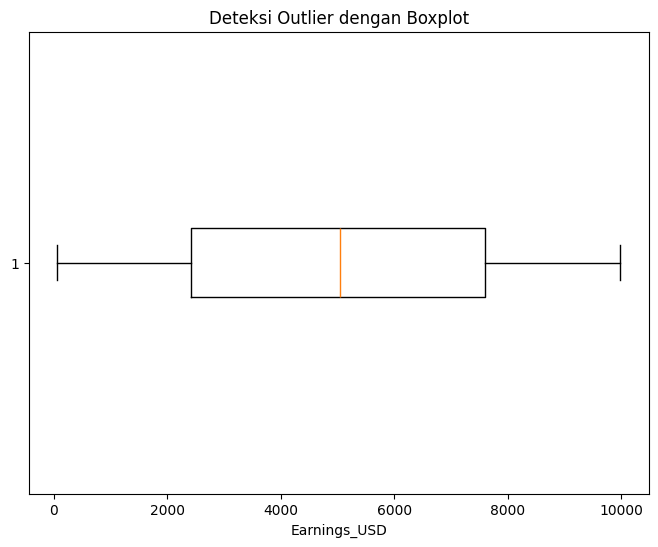

In [101]:
# Deteksi outlier dengan boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Earnings_USD'], vert=False)
plt.title('Deteksi Outlier dengan Boxplot')
plt.xlabel('Earnings_USD')
plt.show()

# Data Analysis

In [102]:
# Perhitungan Persentil

dt_numerik = df.select_dtypes(include=np.number)

print(f'percentile (10%):\n', dt_numerik.quantile(0.1))
print(f'percentile (25%):\n', dt_numerik.quantile(0.25))
print(f'percentile (50%):\n', dt_numerik.quantile(0.5))
print(f'percentile (75%):\n', dt_numerik.quantile(0.75))
print(f'percentile (90%):\n', dt_numerik.quantile(0.9))

percentile (10%):
 Job_Completed         31.900
Earnings_USD         965.000
Hourly_Rate           15.867
Job_Success_Rate      54.659
Client_Rating          3.189
Job_Duration_Days      9.000
Rehire_Rate           16.857
Marketing_Spend       40.000
Name: 0.1, dtype: float64
percentile (25%):
 Job_Completed          76.0000
Earnings_USD         2419.0000
Hourly_Rate            30.0475
Job_Success_Rate       61.9175
Client_Rating           3.5100
Job_Duration_Days      22.0000
Rehire_Rate            27.1500
Marketing_Spend       119.0000
Name: 0.25, dtype: float64
percentile (50%):
 Job_Completed         149.000
Earnings_USD         5048.000
Hourly_Rate            52.285
Job_Success_Rate       75.400
Client_Rating           3.990
Job_Duration_Days      45.000
Rehire_Rate            43.920
Marketing_Spend       252.500
Name: 0.5, dtype: float64
percentile (75%):
 Job_Completed         225.0000
Earnings_USD         7608.2500
Hourly_Rate            75.1250
Job_Success_Rate       87.5375
C

In [103]:
# Range Data
dataRange = dt_numerik.max() - dt_numerik.min()
dataRange

,0
Job_Completed,294.00
Earnings_USD,9940.00
Hourly_Rate,94.81
Job_Success_Rate,49.83
Client_Rating,2.00
Job_Duration_Days,88.00
Rehire_Rate,69.95
Marketing_Spend,499.00


In [104]:
# Distribusi Frekuensi
for col in df:
  freq = df[col].value_counts()
  print(f'{col}:\n {freq}\n')

Job_Category:
 Job_Category
Graphic Design       265
Web Development      256
App Development      248
Customer Support     244
Data Entry           238
SEO                  237
Digital Marketing    231
Content Writing      231
Name: count, dtype: int64

Platform:
 Platform
Upwork           420
Toptal           395
Fiverr           391
Freelancer       386
PeoplePerHour    358
Name: count, dtype: int64

Experience_Level:
 Experience_Level
Beginner        668
Intermediate    641
Expert          641
Name: count, dtype: int64

Client_Region:
 Client_Region
Australia      298
USA            292
Middle East    291
Asia           281
UK             280
Europe         262
Canada         246
Name: count, dtype: int64

Payment_Method:
 Payment_Method
Crypto            514
Bank Transfer     494
Mobile Banking    476
PayPal            466
Name: count, dtype: int64

Job_Completed:
 Job_Completed
250    15
19     15
273    13
116    13
222    12
       ..
288     2
41      1
271     1
105     1
295

# Data Visualization

## Visualisasi 1

In [105]:
# Merubah Isi Data Pada Kolom Kategorikal
cat_cols = ['Job_Category', 'Platform', 'Experience_Level', 'Client_Region', 'Payment_Method']

# Label Encoding
le = LabelEncoder()
for col in cat_cols:
  df[col + '_le'] = le.fit_transform(df[col])

print(df.filter(regex='kol[1-5]_').head())
df_corr = pd.get_dummies(df, columns=cat_cols, prefix=cat_cols, drop_first=True)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


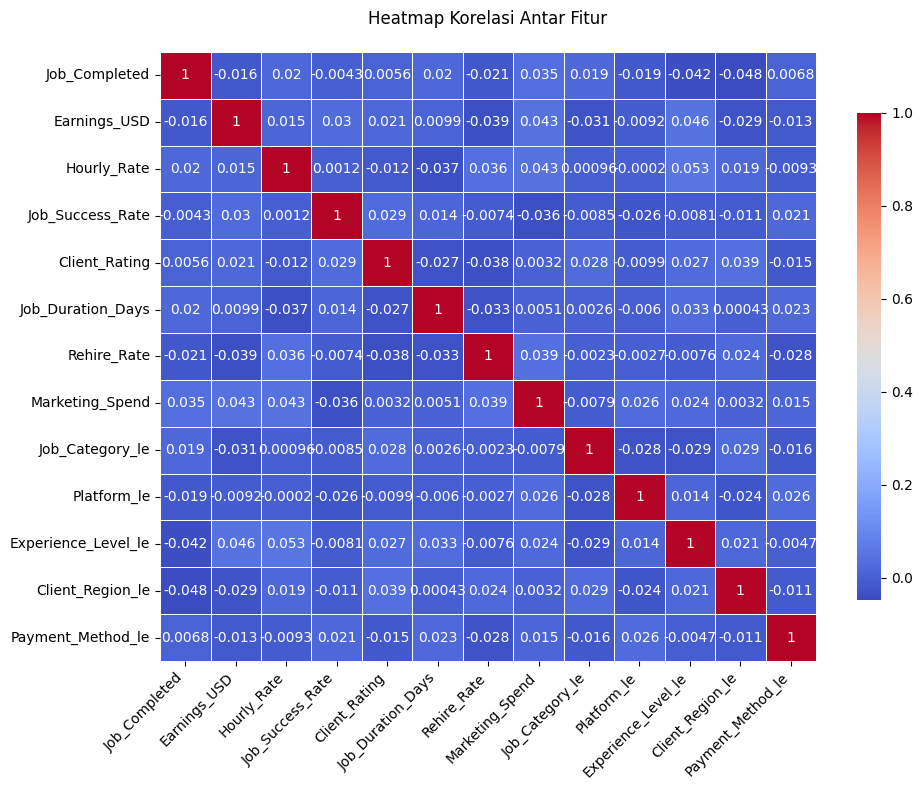

In [106]:
num_df = df_corr.select_dtypes(include=['int64', 'float64'])
corr_matrix = num_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar_kws={'shrink': .8}, linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Visualisasi 2

/tmp/ipython-input-4150469277.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_jobs.values, y=top_5_jobs.index, palette="Blues")


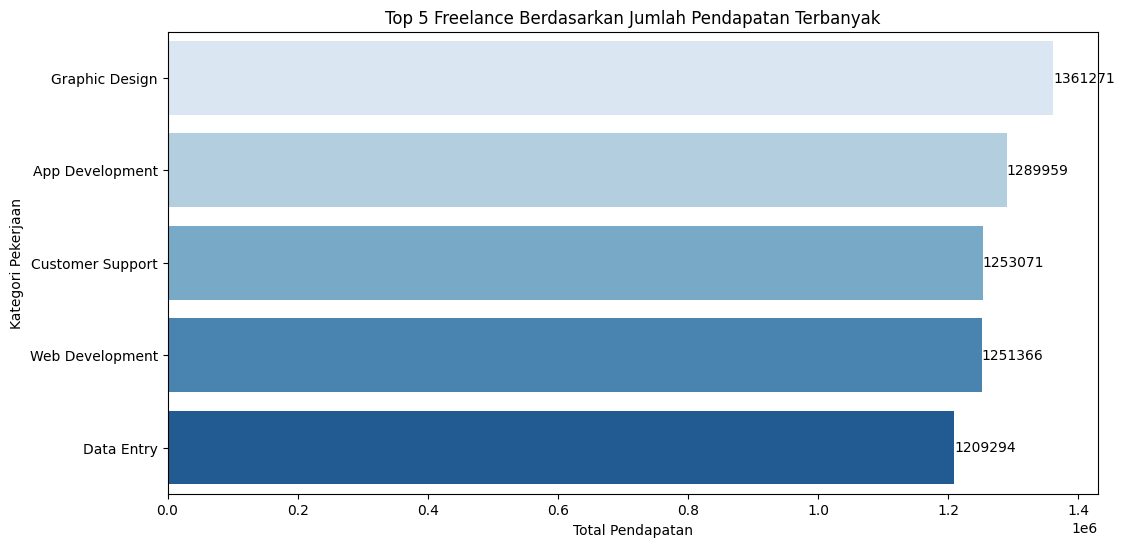

In [107]:
# 5 Freelancer job tertinggi berdasarkan pendapatannya
top_5_jobs = df.groupby('Job_Category')['Earnings_USD'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_jobs.values, y=top_5_jobs.index, palette="Blues")
plt.title('Top 5 Freelance Berdasarkan Jumlah Pendapatan Terbanyak')
plt.xlabel('Total Pendapatan')
plt.ylabel('Kategori Pekerjaan')
for i in range(len(top_5_jobs)):
    plt.text(top_5_jobs.values[i], i, f'{top_5_jobs.values[i]:.0f}', ha='left', va='center')
plt.show()

## Visualisasi 3

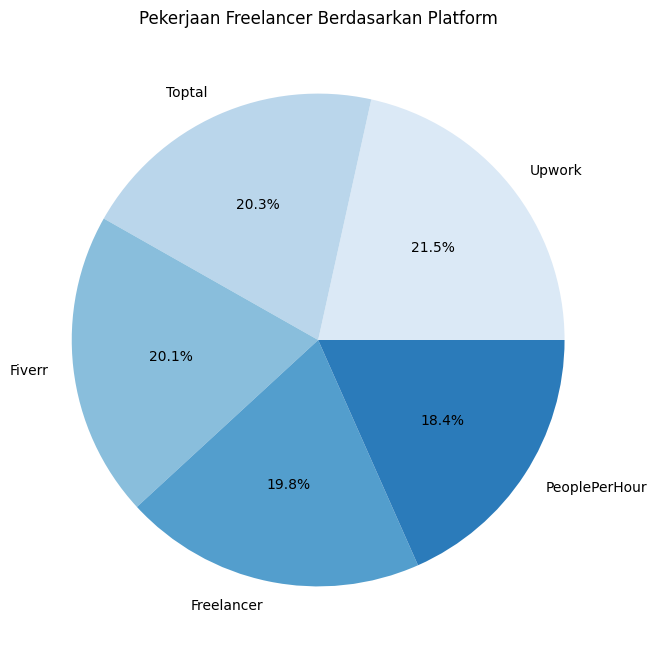

In [108]:
# Sebaran persentase kategori pekerjaan berdasarkan platform
df['Platform'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), colors=sns.color_palette("Blues"))
plt.title("Pekerjaan Freelancer Berdasarkan Platform")
plt.ylabel('')
plt.show()

## Visualisasi 4

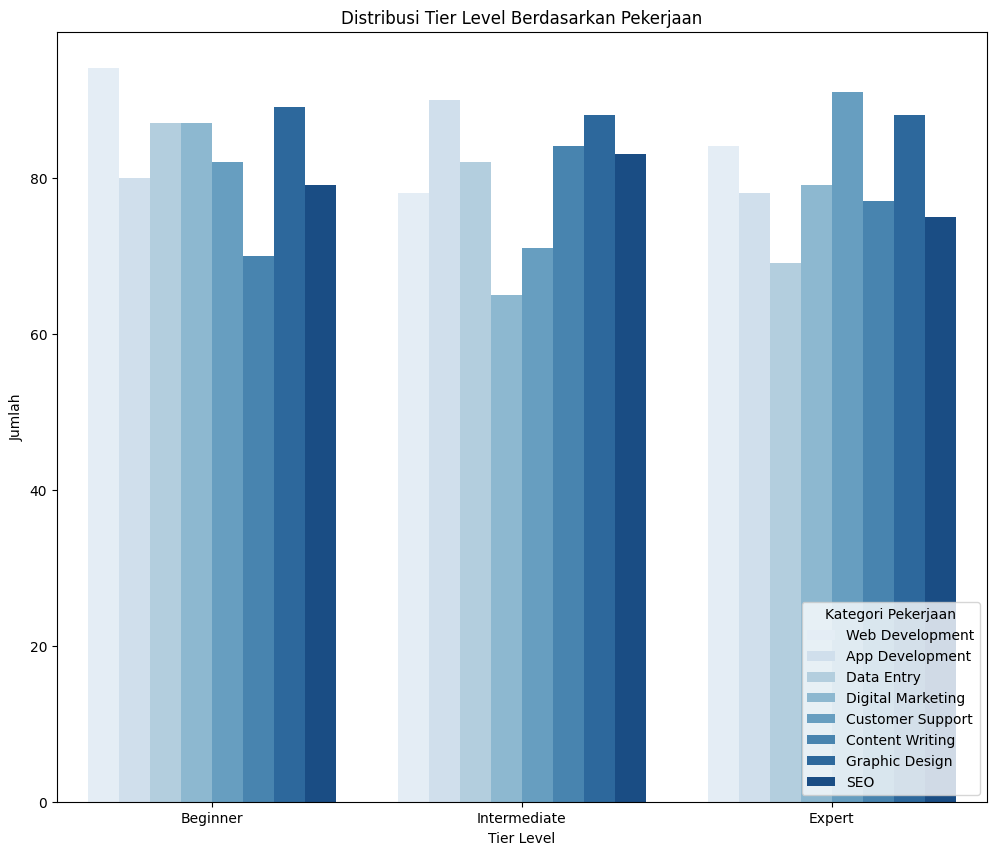

In [109]:
# Distribusi tier level berdasarkan pekerjaannya
plt.figure(figsize=(12, 10))
sns.countplot(x='Experience_Level', hue='Job_Category', data=df, palette='Blues')
plt.title('Distribusi Tier Level Berdasarkan Pekerjaan')
plt.xlabel('Tier Level')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Pekerjaan', loc='lower right')
plt.show()

## Visualisasi 5

/tmp/ipython-input-2802970314.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Client_Region', y='Earnings_USD', data=df, palette='Blues')


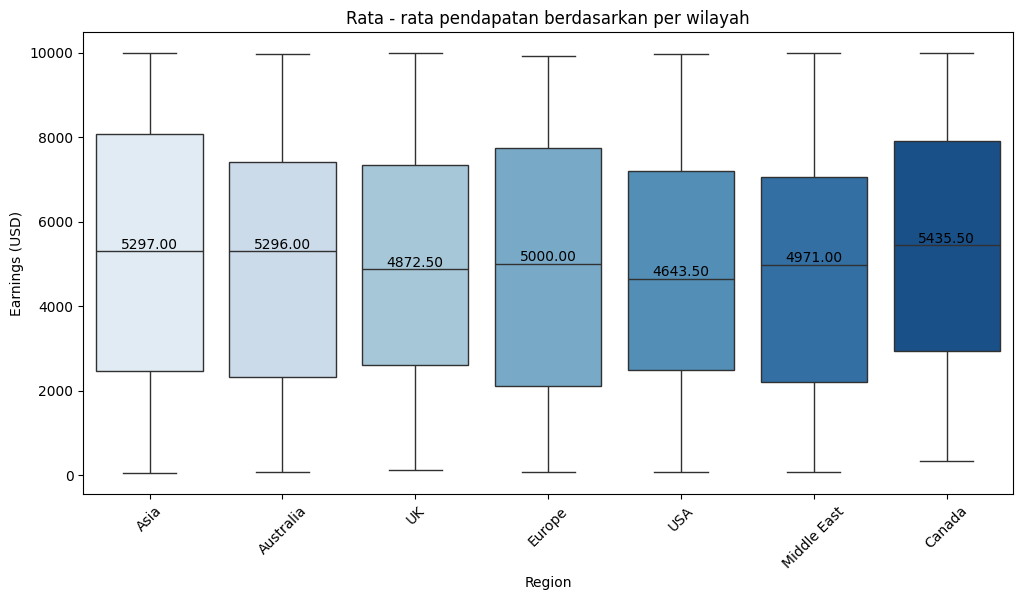

In [110]:
# Rata - rata pendapatan berdasarkan wilayah
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Client_Region', y='Earnings_USD', data=df, palette='Blues')
plt.title('Rata - rata pendapatan berdasarkan per wilayah')
plt.xlabel('Region')
plt.ylabel('Earnings (USD)')
plt.xticks(rotation=45)

# Hitung nilai median untuk setiap wilayah
medians = df.groupby('Client_Region')['Earnings_USD'].median()

# Tambahkan label median ke plot
for i, region in enumerate(df['Client_Region'].unique()):
    median_val = medians[region]
    ax.text(i, median_val, f'{median_val:.2f}', ha='center', va='bottom', color='black', fontsize=10)
plt.show()

# Dashboard

In [116]:
!pip install streamlit -q

In [117]:
%%writefile Dashboard_PI.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
from babel.numbers import format_currency
from sklearn.preprocessing import LabelEncoder

sns.set(style='dark')

df = pd.read_csv('/content/sample_data/freelancer_earnings_bd.csv')

st.header('Dashboard Hasil Analisa Dataset Freelancer Earnings :sparkles:')

# Visualisasi 1
st.subheader('Heatmap Korelasi Antar Fitur')
# Merubah Isi Data Pada Kolom Kategorikal
cat_cols = ['Job_Category', 'Platform', 'Experience_Level', 'Client_Region', 'Payment_Method']

# Label Encoding
le = LabelEncoder()
for col in cat_cols:
  df[col + '_le'] = le.fit_transform(df[col])

print(df.filter(regex='kol[1-5]_').head())
df_corr = pd.get_dummies(df, columns=cat_cols, prefix=cat_cols, drop_first=True)

num_df = df_corr.select_dtypes(include=['int64', 'float64'])
corr_matrix = num_df.corr()
heatmap_corr = plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar_kws={'shrink': .8}, linewidths=0.5)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
st.pyplot(heatmap_corr)
st.write('Dari hasil visualisasi yang ditampilkan dapat disimpulkan bahwa tidak adanya keterikatan atau hubungan yang saling mempengaruhi antara satu kolom dengan kolom lainnya, ini menandakan bahwa data tersebut bersifat berdiri sendiri tanpa ada pengaruh dari kolom lainnya.')

# Visualisasi 2
st.subheader('Top 5 Freelance Berdasarkan Jumlah Pendapatan Terbanyak')
top_5_jobs = df.groupby('Job_Category')['Earnings_USD'].sum().sort_values(ascending=False).head(5)

top5jobs = plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_jobs.values, y=top_5_jobs.index, palette="Blues")
plt.xlabel('Total Pendapatan')
plt.ylabel('Kategori Pekerjaan')
for i in range(len(top_5_jobs)):
    plt.text(top_5_jobs.values[i], i, f'{top_5_jobs.values[i]:.0f}', ha='left', va='center')
st.pyplot(top5jobs)
st.write('Berdasarkan hasil visualisasi yang ditunjukkan dapat diperoleh informasi bahwa 5 pekerjaan freelancer yang memiliki jumlah pendapatan terbanyak adalah Graphic Design, App Development, Customer Support, Web Development, dan Data Entry.')

# Visualisasi 3
st.subheader('Pekerjaan Freelancer Berdasarkan Platform')
freeplot = plt.figure(figsize=(8 ,8))
df['Platform'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Blues"))
plt.ylabel('')
st.pyplot(freeplot)
st.write('Dari hasil yang ditunjukkan dapat diketahui bahwa persebaran para pelaku pekerja freelancer di tahun 2025 menyebar sangat merata di platform yang ada pada tahun tersebut, dengan persentase yang paling tinggi diperoleh dari platform Upwork.')

# Visualisasi 4
st.subheader('Distribusi Tier Level Berdasarkan Pekerjaan')
tierJob = plt.figure(figsize=(12, 10))
sns.countplot(x='Experience_Level', hue='Job_Category', data=df, palette='Blues')
plt.xlabel('Tier Level')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Pekerjaan', loc='lower right')
st.pyplot(tierJob)
st.write('Berdasarkan pada hasil visualisasi yang telah dilakukan dapat diambil  informasi atau wawasan yang cukup menarik, bahwa pada kategori pekerjaan dengan pengalaman beginner atau pemula terbanyak di pekerjaan sebagai web development, pada level pengalaman bekerja intermediate yang tertinggi ada pada pekerjaan app development, dan pada level expert atau mahir yang tertinggi ada pada pekerjaan sebagai Customer Support.')

# Visualisasi 5
st.subheader('Rata - rata Pendapatan Berdasarkan Wilayah')
AvgReg = plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Client_Region', y='Earnings_USD', data=df, palette='Blues')
plt.xlabel('Region')
plt.ylabel('Earnings (USD)')
plt.xticks(rotation=45)

# Hitung nilai median untuk setiap wilayah
medians = df.groupby('Client_Region')['Earnings_USD'].median()

# Tambahkan label median ke plot
for i, region in enumerate(df['Client_Region'].unique()):
    median_val = medians[region]
    ax.text(i, median_val, f'{median_val:.2f}', ha='center', va='bottom', color='black', fontsize=10)
st.pyplot(AvgReg)
st.write('Berdasarkan hasil yang ditampilkan dapat diambil informasi bahwa jumlah pendapatan yang dihasilkan dari 7 wilayah berbeda pada titik terendah yang berbeda juga, ini sejalan dengan berbedanya rata - rata pendapatan hingga sampai ke nilai pendapatan tertinggi, faktor yang mungkin memengaruhi hal tersebut adalah karena perbedaan bayaran untuk per-jamnya, platform tempat bekerja yang berbeda, dan lama durasi projek yang dikerjakan.')

Overwriting Dashboard_PI.py


In [118]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦
up to date, audited 23 packages in 910ms
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦
2 high severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠦

In [119]:
!streamlit run Dashboard_PI.py &>/content/logs.txt & curl ipv4.icanhazip.com

34.46.9.55


In [120]:
!npx localtunnel --port 8501

⠙your url is: https://fifty-turtles-rest.loca.lt
^C
